In [1]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/badvideogames/youtube_comments_aX5rs0jjkw8.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=aX5rs0jjkw8,Balan Wonderworld,2021-04-11T19:30:01Z,@gracie5670,0:05 As someone who has beaten Super Mario Ody...,2024-11-10T18:51:43Z,0,0
1,https://www.youtube.com/watch?v=aX5rs0jjkw8,Balan Wonderworld,2021-04-11T19:30:01Z,@Detilly,What the fuck,2024-11-10T16:05:07Z,0,0
2,https://www.youtube.com/watch?v=aX5rs0jjkw8,Balan Wonderworld,2021-04-11T19:30:01Z,@Joelmix26,to clarify your question on how they got the r...,2024-11-08T21:14:38Z,0,0
3,https://www.youtube.com/watch?v=aX5rs0jjkw8,Balan Wonderworld,2021-04-11T19:30:01Z,@bookle5829,Bland Wonderworld,2024-11-08T07:46:44Z,0,0
4,https://www.youtube.com/watch?v=aX5rs0jjkw8,Balan Wonderworld,2021-04-11T19:30:01Z,@uzuwi9782,its actually insane how bad this game is. it l...,2024-11-07T02:50:53Z,0,1
...,...,...,...,...,...,...,...,...
9995,https://www.youtube.com/watch?v=aX5rs0jjkw8,Balan Wonderworld,2021-04-11T19:30:01Z,@dcstudiosiphone3029,This will be the Knack killer,2021-04-11T21:51:39Z,0,1
9996,https://www.youtube.com/watch?v=aX5rs0jjkw8,Balan Wonderworld,2021-04-11T19:30:01Z,@no_uhs5249,Why is this in 480p,2021-04-11T21:51:25Z,0,1
9997,https://www.youtube.com/watch?v=aX5rs0jjkw8,Balan Wonderworld,2021-04-11T19:30:01Z,@gex1290,Glad we got another strand type game,2021-04-11T21:51:22Z,0,0
9998,https://www.youtube.com/watch?v=aX5rs0jjkw8,Balan Wonderworld,2021-04-11T19:30:01Z,@SagetLord,Ohhh the pain.... the horror...,2021-04-11T21:51:13Z,0,0


In [3]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['harry', 'potter', 'hogwarts','legacy',
    'like', 'take', 'studio', 'got', 'people', 'get', 
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])

new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
     'like', 'take', 'studio', 'got', 'people', 'get',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','video','game','give',
    'lol','gon','ive','want','better','one','first',
    'would','see','played','lmao',"halo", "infinite", "ill", "fair", 
    "buying", "player", "shit", "new", "look", "good", "console", "bad",
    "sound", "back", "code", "wait", "another", "still", "year", "fps", "yeah", 
    "buy", "fun", "thing", "zone","actual","cost","wtf","fuck","believe","wow","watch","thought","intentionally"
])
lmtzr = WordNetLemmatizer()

In [4]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams

In [5]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
2378,2021-04-18,6:28\nIt’s fucking Aunt Fanny from Robots I’m ...,628 fucking aunt fanny robot done
2379,2021-04-18,8:42 I was both horrified and filled with laug...,842 horrified filled laughter sight real game
2380,2021-04-18,We now have Breath of the wild by Ubisoft and ...,breath wild ubisoft odissey square next smash ...
2381,2021-04-18,Doodoo apocalypse the game,doodoo apocalypse game
2382,2021-04-18,"1% skill, 1% pain",skill pain
...,...,...,...
9995,2021-04-11,This will be the Knack killer,knack killer
9996,2021-04-11,Why is this in 480p,480p
9997,2021-04-11,Glad we got another strand type game,glad another strand type game
9998,2021-04-11,Ohhh the pain.... the horror...,ohhh pain horror


In [6]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=0).reset_index(drop=True)  # Use any integer as the random_state

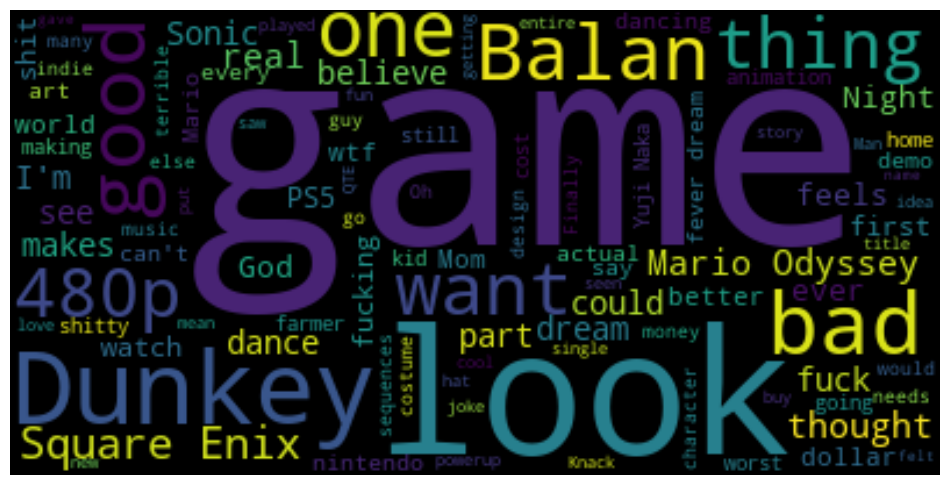

In [7]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['processed_comments'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df



The video has mostly negative comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2021-04-12,Dunkey singing remember the name was gold,dunkey singing remember name gold,neutral
1,2021-04-13,Dunkey gave this game a better chance than Ark...,dunkey gave game better chance arkham city,positive
2,2021-04-11,What,,neutral
3,2021-04-13,"This game is a mixed bag, it got a lot of good...",game mixed bag lot good thing part sun glare m...,positive
4,2021-04-11,Square Enix should have just made Mischief Mak...,square enix mischief maker remake,negative
...,...,...,...,...
495,2021-04-12,This is why you don’t mix mighty number nine a...,mix mighty number nine yokka laylee,positive
496,2021-04-13,"Kid: ""Mommy I want Super Mario Odyssey!""\n\nMo...",kid mommy want super mario odyssey mom baby ma...,positive
497,2021-04-12,3:42 tbh a concert in where the platform is m...,342 tbh concert platform moving shiiii dawg br...,neutral
498,2021-04-13,This is like Super Mario Odyssey if it was mad...,super mario odyssey guy veggie tale,positive


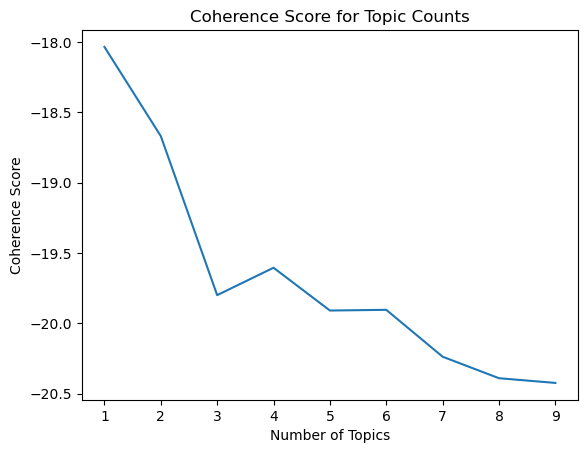

In [9]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [10]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 2
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.008*"dream" + 0.008*"dunkey" + 0.005*"god" + 0.004*"fever" + 0.004*"sonic" + 0.004*"night" + 0.003*"shitty" + 0.003*"ever" + 0.003*"say" + 0.003*"joke"'), (1, '0.006*"real" + 0.005*"balan" + 0.005*"mario" + 0.005*"square" + 0.005*"dance" + 0.005*"odyssey" + 0.005*"enix" + 0.004*"money" + 0.004*"fucking" + 0.003*"dollar"')]


The graph's line starts plunging at 2, where it continues to decrease.
We can also see 2 topics in the bigrams

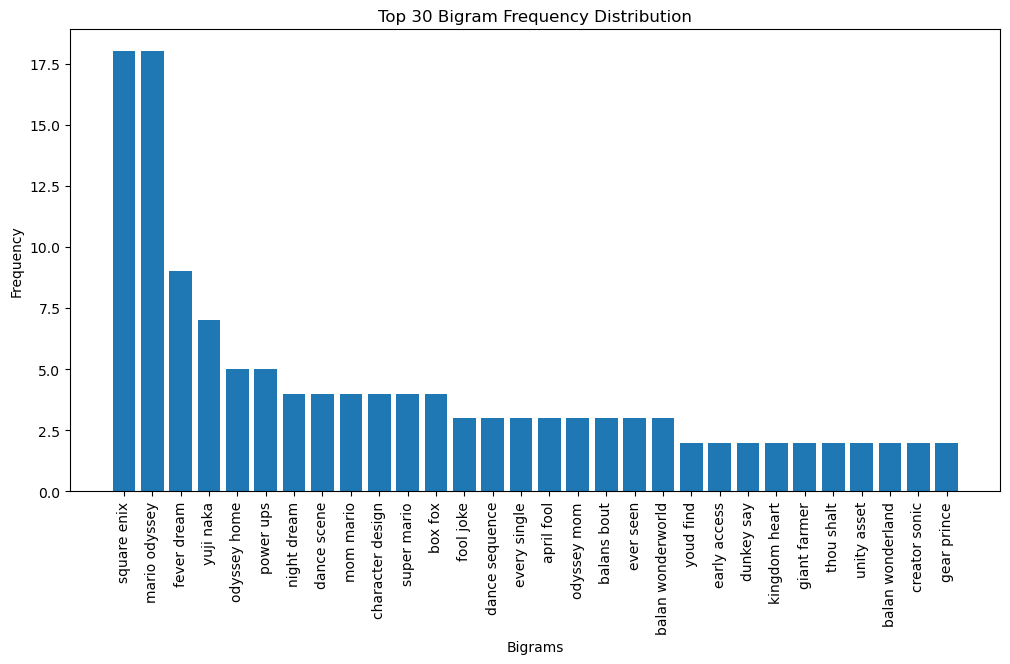

In [12]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [13]:
#Load the existing df_topics CSV file
title=DF['title'].unique()
file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_bad_topics.csv'
df_bad_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
df_bad_topics = pd.concat([df_bad_topics, new_row], ignore_index=True)
# Save the updated DataFrame back to the CSV file
df_bad_topics.to_csv(file_path, index=False)
df_bad_topics

,title,num_topics
0,The Last of Us Part II - Angry Review,1
1,Fallout 76 Angry Review,1
2,Is Kingdom Come Deliverance Racist?,1
3,"So far, I do not recommend: Battlefield 2042 (...",4
4,Call of Duty: Modern Warfare 3 Single-Player C...,1
5,Suicide Squad: Kill the Justice League Review,3
6,Atomic Heart is 2023's First Major Disappointm...,2
7,Concord Review,1
8,"I talked to Ubisoft Devs, it's far worse than ...",1
9,Balan Wonderworld,2
